# QUERY 3.1
Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
r=pd.read_csv(r"C:\Users\RACHIT\Desktop\dataset\GOLD.csv")
%matplotlib inline
xdataset=r.drop(['Date','Vol.','Change %','Pred','new'],axis=1)
# Right now taking into consideration new column to check if it is Linear or Polynomial
ydataset=r['new']
xtrain,xtest,ytrain,ytest=train_test_split(xdataset,ydataset,test_size=0.3,random_state=2)


linear=LinearRegression()
linear.fit(xtrain,ytrain)
print('The coefficient for Linear Regression are',linear.coef_)
print('Assume new column is Linear So MSE is',mean_squared_error(ytest,linear.predict(xtest)))

linear1=LinearRegression()
poly=PolynomialFeatures(degree=2)
xrain=poly.fit_transform(xtrain.values)
xwhole=poly.fit_transform(xdataset.values)
#yrain=poly.fit_transform([ytrain])
linear1.fit(xrain,ytrain)
print('The coefficient for Polynomial Regression are',linear1.coef_)
#linear.predict(poly.fit_transform(xtest.values))
print('Assume new column is Polynomial So MSE is',mean_squared_error(ytest,linear1.predict(poly.fit_transform(xtest.values))))
print('Our Second Assumption has less Error Hence new Column is Polynomial')


The coefficient for Linear Regression are [ 1.01306267 -1.00039938  1.00537134 -1.01810115]
Assume new column is Linear So MSE is 0.2841148088565647
The coefficient for Polynomial Regression are [ 0.00000000e+00  1.01143585e+00 -1.00058453e+00  1.00498370e+00
 -1.01590068e+00  2.73163332e-07 -1.06766960e-06  3.26670411e-05
 -3.25170942e-05 -3.81729920e-07  6.25464412e-07  1.22690759e-06
 -1.22430358e-07 -3.32134990e-05  3.25116747e-05]
Assume new column is Polynomial So MSE is 0.00035408750824057506
Our Second Assumption has less Error Hence new Column is Polynomial


0.0003495715527131423
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


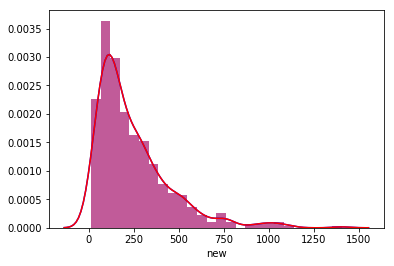

In [21]:
import warnings
warnings.simplefilter('ignore')
e=r.loc[0:410]
d=r.loc[411:512]
dcop=d.drop(['Date','Vol.','Change %','Pred','new'],axis=1)
store=linear.predict(dcop)
d['Pred']=store[0:101]
d['Pred']=round(d['Pred'])
r1=pd.concat([e,d],axis=0)

new_predict=linear1.predict(xwhole) # fit new column with Polynomial Features and predict on the xdataset
r1['new_predict']=new_predict
print(mean_squared_error(r1['new_predict'],r1['new']))
print(sns.distplot(r1['new_predict'],color='b',label='Pred'))
print(sns.distplot(r1['new'],color='r',label='new'))


# QUERY 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results


In [22]:
import statsmodels.api as sm
## DAILY VALUE RETURN FROM 2 JULY TO 2 OCT
## MONTHLY VALUE RETURN FROM 2 MAY TO 2 JULY
data1=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\PNB.csv') #DAILY
data2=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\nifty.csv')#DAILY
data3=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\mnpnb.csv')#MONTHLY
data4=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\mnif.csv')#MONTHLY
Y=data1['Close'].pct_change().dropna(axis=0)
X=data2['Close'].pct_change().dropna(axis=0)
A=data3['Close'].pct_change().dropna(axis=0)
B=data4['Close'].pct_change().dropna(axis=0)
X1 = sm.add_constant(X)
X2=sm.add_constant(B)
model = sm.OLS(Y, X1)
model1= sm.OLS(A,X2)
results = model.fit()
results1 = model1.fit()
results.summary()
print('THe daily slope or BETA value is',results.params.Close)
print('THe monthly slope or BETA value is',results1.params.Close)
##model=sm.OLS(pnbpct,niftypct)

## NOTE
##A beta that is greater than 1.0 indicates that the security's price is theoretically more volatile than the market. For example, if a stock's beta is 1.2, it is assumed to be 20% more volatile than the market.
#A beta value of less than 1.0 means that the security is theoretically less volatile than the market, meaning the portfolio is less risky with the stock included than without it. For example, utility stocks often have low betas because they tend to move more slowly than market averages.
#A beta of -1.0 means that the stock is inversely correlated to the market benchmark as if it were an opposite, mirror image of the benchmark’s trends. 

THe daily slope or BETA value is 2.1114939172659493
THe monthly slope or BETA value is -1.4002905516275446
